In [28]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# connect to Artemis

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-02-26 22:18:00,160 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-02-26 22:18:02,830 | INFO     |: Connected to C0:83:D5:66:86:3C


In [ ]:
# disconnect from Artemis
ble.disconnect()

In [45]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [69]:
# read and aggregate pitch and tolled timestamped data for FFT

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    
    pitch.append(float(reading[0]))
    roll.append(float(reading[1]))
    
    if len(roll) == 200:
        ble.stop_notify(ble.uuid['RX_STRING'])
    

roll = []
pitch = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_FFT, "")

In [68]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

In [70]:
# verify values are read
print(roll);
print("")
print(pitch)

print(len(pitch))


[0.815, -1.152, -1.237, -1.514, -1.168, -1.908, -1.267, -1.207, -1.355, 0.731, 0.674, -1.87, 0.84, -1.56, -2.43, -1.576, -1.142, 0.677, 0.271, 0.27, -1.352, 0.842, -1.799, -1.444, -1.683, -1.222, -1.14, -1.114, 0.243, -1.99, -1.143, -1.2, 0.485, -1.361, -1.123, 0.983, 0.815, -1.363, -1.77, 0.872, -1.811, -1.22, 0.84, -1.136, -1.64, 0.844, -1.701, -1.292, 0.816, -1.195, -1.685, -1.416, -1.121, -1.67, 0.803, 0.651, -1.821, 0.765, -1.246, -1.278, -1.6, 0.705, 0.751, -1.393, -1.95, -1.198, -1.344, -1.259, -1.387, 0.869, 0.579, -1.219, -1.77, -1.286, -1.387, 0.816, -1.776, 0.791, 0.731, -1.506, -1.565, 0.513, 0.969, 0.929, -1.28, -1.2, -1.196, -1.551, 0.811, -1.917, 0.843, -1.375, 0.814, 0.487, -1.147, -1.256, -1.248, -1.463, 0.792, 0.135, -1.88, -1.368, 0.704, 0.833, 0.595, -1.222, 0.926, 0.781, -1.979, -1.18, -1.232, -1.585, 0.901, -2.86, -1.535, -1.399, -1.989, -1.153, 0.543, -1.84, -1.253, 0.839, 0.684, -1.604, -1.84, 0.704, -1.573, -1.549, -1.391, -1.179, -1.223, 0.871, -1.574, -1.222,

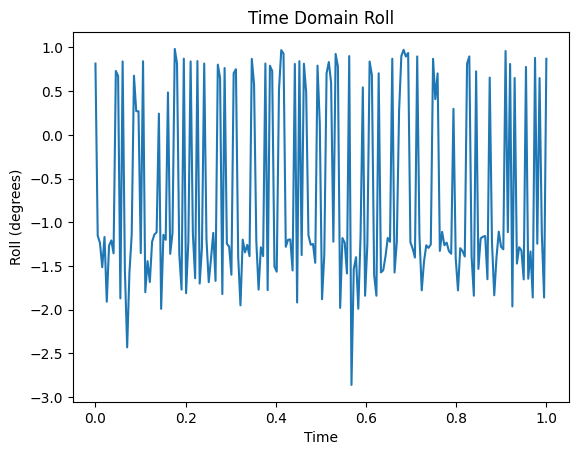

In [76]:
# again, on roll

import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft

sample_rate = 200
N = (1 - 0) * sample_rate
time = np.linspace(0, 1, N)

plt.plot (time, roll)
plt.title ('Time Domain Roll')
plt.xlabel ('Time')
plt.ylabel ('Roll (degrees)')
plt.show ()



/Users/kunalgupta/Desktop/CORNELL/SP23/Fast Robots/lab3_v2/FastRobots_ble/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


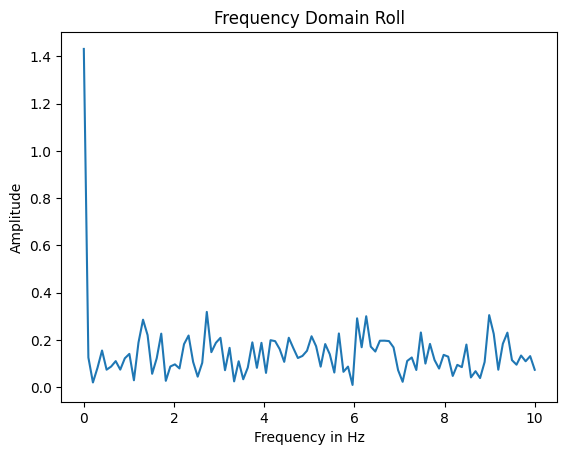

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [77]:
frequency = np.linspace (0.0, 10, int (N/2))

freq_data = fft(roll)
y = 2/N * np.abs (freq_data [0:np.int (N/2)])


plt.plot(frequency, y)
plt.title('Frequency Domain Roll')
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.show()

print(frequency)